<a href="https://colab.research.google.com/github/manvendra-07/DL-Lab/blob/main/Week%206/200968146_DL_Week6_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Required Libraries

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Preparing the data

- **Importing the dataset**

In [26]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
train_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [27]:
train_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


- **Performing MinMax Scaling over the dataset**

In [28]:
## Train set
training_set=train_set.iloc[:,1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Test set
testing_set=train_set.iloc[:,1:2].values
testing_set_scaled = sc.fit_transform(testing_set)

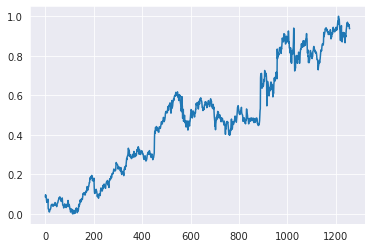

In [29]:
plt.plot(training_set_scaled)
plt.show()

- **Spiliting the data into the required timesteps to be fed to sequence models**


In [30]:
X_train, Y_train, X_test = [], [], []

timesteps = 50
for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

for i in range(timesteps, len(testing_set_scaled)):
    X_test.append(training_set_scaled[i-timesteps:i,0])
    
X_train, Y_train, X_test = np.array(X_train), np.array(Y_train), np.array(X_test)

- **Reshaping the data into (instances, timesteps, dimension) shape**

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Functions for Visualisation

In [32]:
def visualise_train(history):
  sns.set_style("darkgrid")
  train_mse = history.history['mse']
  valid_mse = history.history['val_mse']
  epochs = range(1, len(valid_mse) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, train_mse, 'b', label='Training MSE')
  plt.plot(epochs, valid_mse, 'r', label='Validation MSE')
  plt.xlabel('Epoch #')
  plt.ylabel('Loss')
  plt.title('Training and Validation MSE')
  plt.legend()

  plt.show()

In [33]:
def visualise_test(Y_pred):
  Y_pred = sc.inverse_transform(Y_pred)
  plt.plot(testing_set, color = "red", label = "Real Google Stock Price")
  plt.plot(Y_pred, color = "blue", label = "Predicted Google Stock Price")
  plt.title("Google Stock Price Prediction")
  plt.xlabel("Time")
  plt.ylabel("Google Stock Price")
  plt.legend()
  plt.show()

## Simple RNN Model

- **Creating the SimpleRNN model using SimpleRNN layers from Keras**

In [34]:
def SimpleRNN():
  regressor = tf.keras.Sequential([
      tf.keras.layers.SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.SimpleRNN(units=50,return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.SimpleRNN(units=50,return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.SimpleRNN(units=50),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(units=1)
      ])
  regressor.summary()
  regressor.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.MeanSquaredError(name='mse')])
  return regressor

- **Training the Simple RNN Model**

In [35]:
rnn = SimpleRNN()
history_rnn = rnn.fit(X_train, Y_train, batch_size = 32, epochs = 20, validation_split=0.3, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 50, 50)            2600      
                                                                 
 dropout_12 (Dropout)        (None, 50, 50)            0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_13 (Dropout)        (None, 50, 50)            0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 50, 50)            5050      
                                                                 
 dropout_14 (Dropout)        (None, 50, 50)            0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 50)               

- **Visualising the Training Error**

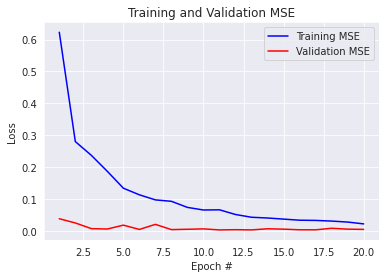

In [36]:
visualise_train(history_rnn)

- **Testing the model**

In [37]:
Y_pred_rnn = rnn.predict(X_test, verbose = 1)

38/38 [==============================] - 1s 18ms/step


- **Visualising the results**

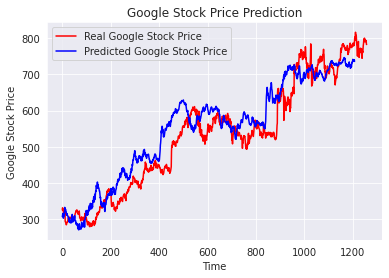

In [38]:
visualise_test(Y_pred_rnn)

## LSTM Model

- **Creating the LSTM Model**

In [39]:
def LSTM():
  regressor = tf.keras.Sequential([
      tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(units=50,return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(units=50,return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(units=50),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(units=1)
      ])
  regressor.summary()
  regressor.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.MeanSquaredError(name='mse')])
  return regressor

- **Training the LSTM Model**

In [40]:
lstm = LSTM()
history_lstm = lstm.fit(X_train, Y_train, batch_size = 32, epochs = 20, validation_split = 0.3, verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10400     
                                                                 
 dropout_16 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_17 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_18 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

- **Visualising the Training Error**

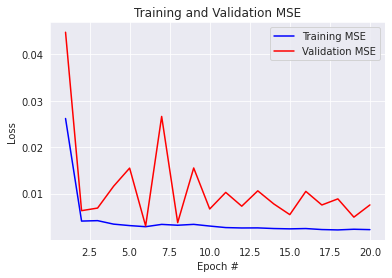

In [41]:
visualise_train(history_lstm)

- **Testing the Model**

In [42]:
Y_pred_lstm = lstm.predict(X_test, verbose=1)

38/38 [==============================] - 2s 7ms/step


- **Visualising the results**

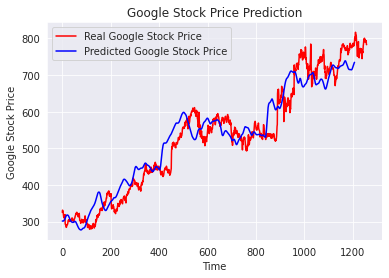

In [43]:
visualise_test(Y_pred_lstm)

## Tabulation of both the models for comparison

In [44]:
from tabulate import tabulate
table = [['MSE', 'SimpleRNN', 'LSTM'],
         ['Train',history_rnn.history['mse'][-1], history_lstm.history['mse'][-1]],
         ['Test', Y_pred_rnn[1], Y_pred_lstm[1]]
        ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════╤═════════════╤═══════════╕
│ MSE   │   SimpleRNN │      LSTM │
╞═══════╪═════════════╪═══════════╡
│ Train │   0.0213336 │ 0.0022288 │
├───────┼─────────────┼───────────┤
│ Test  │   0.0570883 │ 0.0418056 │
╘═══════╧═════════════╧═══════════╛
